In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
boston=pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.rename(columns = {'MEDV':'Price'}, inplace = True) 

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

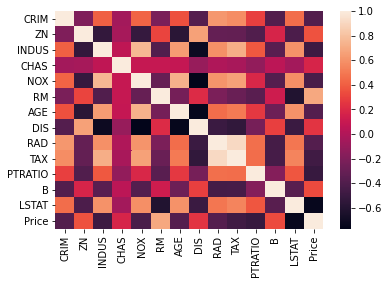

In [7]:
# Correlation between Different features
sns.heatmap(boston.corr())

C:\Users\arindam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

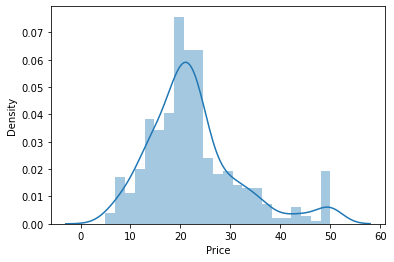

In [8]:
# Distributing of Price Column
sns.distplot(boston['Price'])

In [9]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
y = boston['Price']

In [10]:

from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
#Train/fit the model to training data
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

25.4695284427632


,Coefficient
CRIM,-0.102245
ZN,0.031104
INDUS,0.014369
CHAS,1.659646
NOX,-15.869391
RM,5.032224
AGE,-0.000716
DIS,-1.313538
RAD,0.255945
TAX,-0.012337


In [19]:
pred = lr.predict(X_test)

In [20]:
pred 

array([ 9.70536163e+00,  2.52526846e+01,  1.99563787e+01,  2.78890172e+01,
        2.22739530e+01,  2.32476003e+01,  1.62794573e+01,  1.69545473e+01,
        1.29304677e+01,  2.49423296e+01,  1.44246339e+01,  2.86653627e+01,
        1.76944262e+01,  3.46031656e+01,  1.85769591e+01,  1.35355785e+01,
        1.40027050e+01,  2.86569561e+01,  2.24340994e+01,  2.41506896e+01,
        2.40056244e+01,  3.72997269e+01,  3.06816250e+01,  1.93607196e+01,
        2.05776606e+01,  1.70641899e+01,  1.15241219e+01,  2.40849661e+01,
        3.10697041e+01,  2.36199284e+01,  2.10421914e+01,  5.88252060e+00,
        3.03053885e+01,  3.63167383e+01,  2.16908598e+01,  3.23510449e+01,
        3.46814402e+01,  2.07641740e+01,  2.85939847e+01,  4.01152089e+01,
        3.98810686e+01,  1.27048376e+01,  2.06620305e+01,  2.52423966e+01,
        2.08504892e+00,  1.46209833e+01,  2.22242105e+01,  3.48031883e+01,
        2.60939130e+01,  2.16408781e+01,  3.03883691e+01,  2.52756205e+01,
        1.50906276e+01,  

Text(0, 0.5, 'Predicted prices')

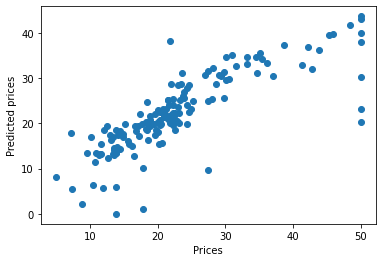

In [21]:
plt.scatter(y_test,pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.678977534499435
MSE: 33.868033996669986
RMSE: 5.819624901715744


In [26]:
print("Rsquare=",metrics.r2_score(y_test,pred))

Rsquare= 0.6685538790447989
